## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Skill_Recommender/EDA/EDA_updated/Base_Etudiant.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_et                  2621 non-null   object 
 1   date_nais_et           2621 non-null   object 
 2   lieu_nais_et           2619 non-null   object 
 3   date_bac               2259 non-null   object 
 4   etab_bac               2457 non-null   object 
 5   niveau_diplome_sup_et  2259 non-null   float64
 6   lib_specialite_esp_et  2621 non-null   object 
 7   date_entree_esp_et     1388 non-null   object 
 8   lib_nature_bac         2563 non-null   object 
 9   classe_courante_et     2621 non-null   object 
 10  classe_sem1            2369 non-null   object 
 11  niveau_courant_et      2621 non-null   int64  
 12  sexe                   2621 non-null   object 
 13  nationalite            2619 non-null   object 
 14  niveau_acces           2621 non-null   int64  
 15  clas

In [ ]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

lieu_nais_et: 0.0008% missing values
date_bac: 0.1381% missing values
etab_bac: 0.0626% missing values
date_entree_esp_et: 0.4704% missing values
lib_nature_bac: 0.0221% missing values
classe_sem1: 0.0961% missing values
nationalite: 0.0008% missing values
classe_prec_et: 0.3453% missing values
resultat_annee_prec: 0.3571% missing values
gouvernorat: 0.1702% missing values


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
niveau_diplome_sup_et,2259.0,0.691014,1.233990,0.0,0.0000,0.00,1.0000,3.00
niveau_courant_et,2621.0,1.839756,0.839551,1.0,1.0000,2.00,2.0000,4.00
niveau_acces,2621.0,2.688668,1.378122,1.0,1.0000,3.00,4.0000,5.00
moy_bac,2522.0,11.096622,1.884248,9.0,10.0825,10.77,11.7875,76.35
score_final,2621.0,-0.542774,5.143817,-1.0,-1.0000,-1.00,-1.0000,75.08


In [ ]:
df.isnull().sum()


,0
id_et,0
date_nais_et,0
lieu_nais_et,2
date_bac,362
etab_bac,164
niveau_diplome_sup_et,362
lib_specialite_esp_et,0
date_entree_esp_et,1233
lib_nature_bac,58
classe_courante_et,0


<Axes: >

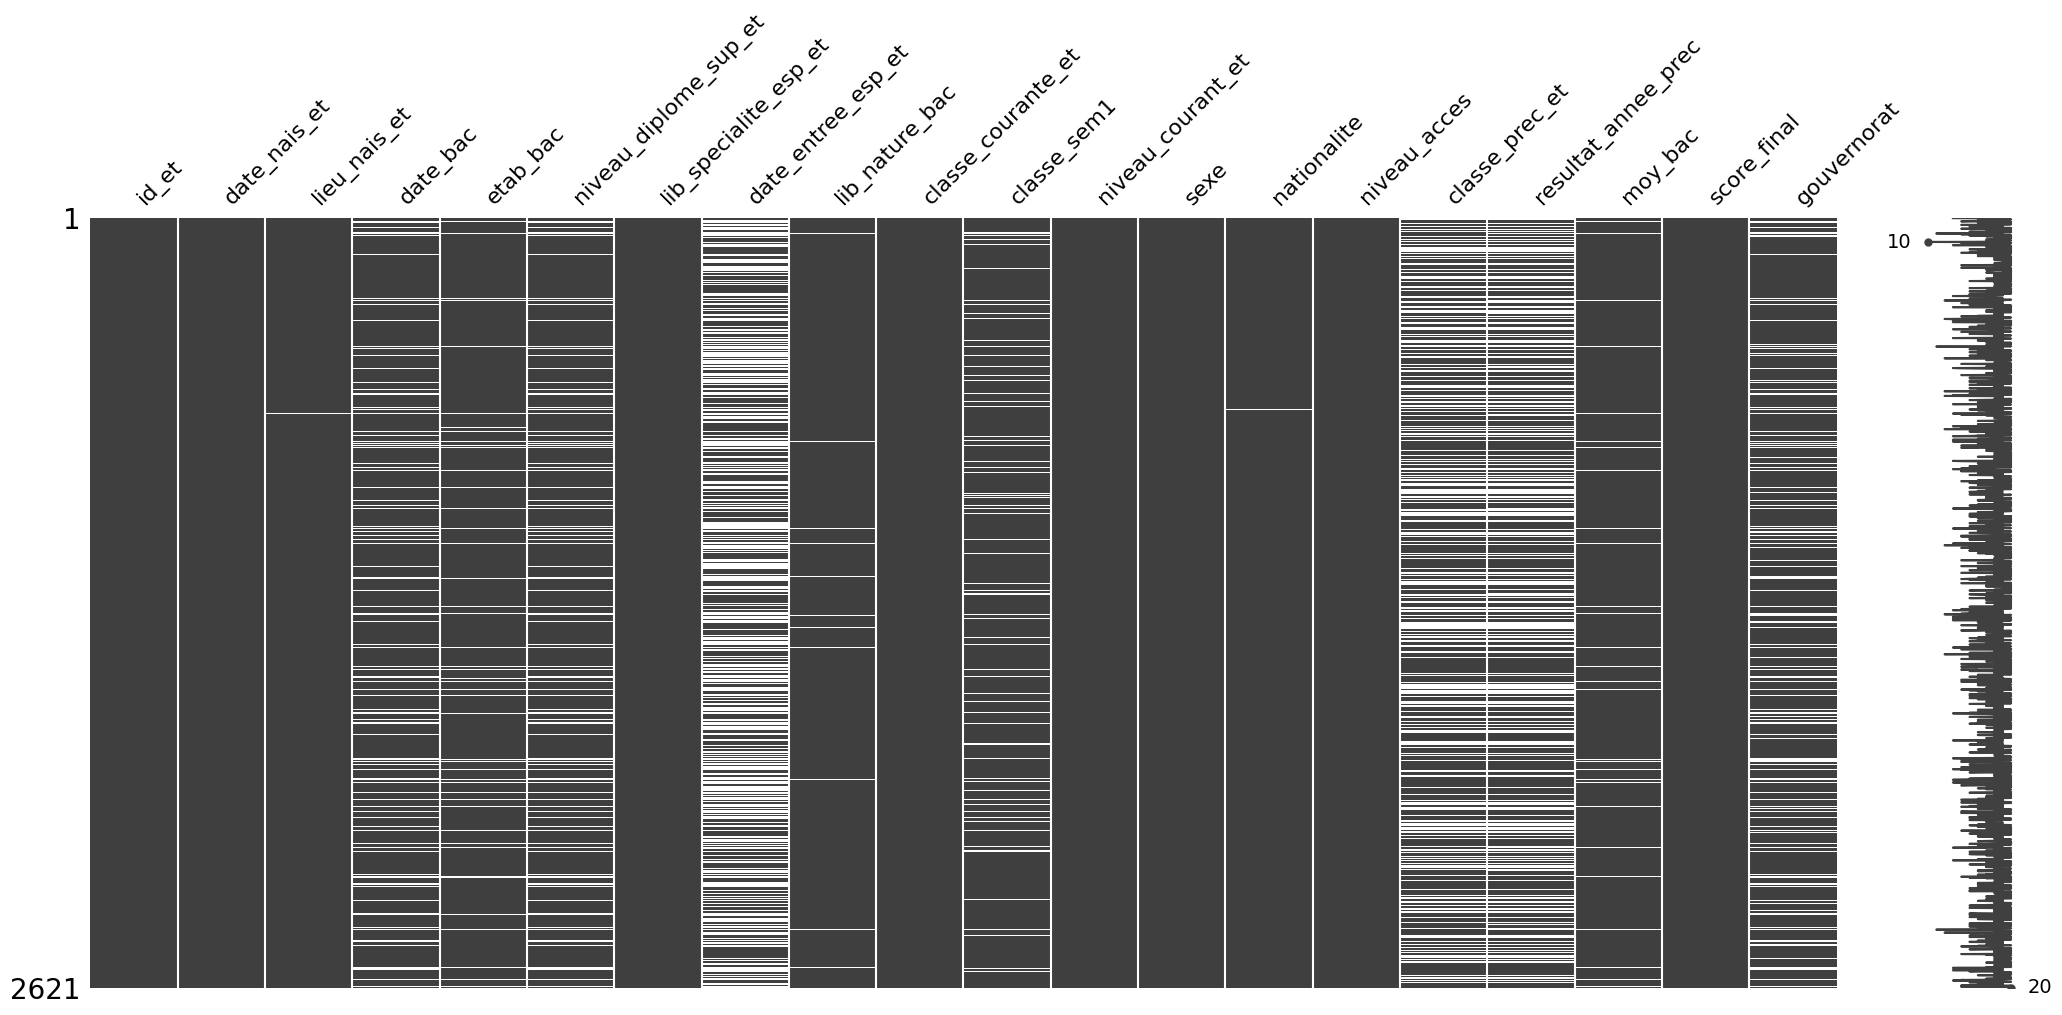

In [ ]:
#Visualizing missing values using Massingno library
#The white strips in the plot indicate the missing values
import missingno as msno
msno.matrix(df)

In [ ]:
#df_copy is deep copy of df
df_copy= df.copy(deep=True)
df_copy

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id_et,date_nais_et,lieu_nais_et,date_bac,etab_bac,niveau_diplome_sup_et,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,classe_sem1,niveau_courant_et,sexe,nationalite,niveau_acces,classe_prec_et,resultat_annee_prec,moy_bac,score_final,gouvernorat
0,ID1,10/07/1996 00:00,Tunis,NaN,NaN,NaN,Master Professionnel en Business Analytics,NaN,NaN,2-BA-2,2-BA-2,2,M,TUNISIENNE,5,1-BA-2,Admis,NaN,-1.0,NaN
1,ID2,19/12/2002 00:00,TUNIS,01/06/2021 00:00,Lycée Secondaire Ezzahra,3.0,Master Professionnel en Marketing Digital,16/09/2024 00:00,Bac Informatique,1-MKD-1,---,1,M,TUNISIENNE,4,NaN,NaN,12.91,-1.0,Ben Arous
2,ID3,09/08/2003 00:00,TUNIS,01/06/2024 00:00,Lycee Secondaire ASDRUBAL BARDO,0.0,Licence en Sciences de Gestion,30/08/2024 00:00,Bac Economie,1-LSG-1,1-LSG-1,1,M,TUNISIENNE,1,NaN,NaN,9.81,-1.0,Ariana
3,ID4,15/09/1999 00:00,TUNIS,NaN,Lycée les pères blancs,NaN,Master Professionnel en Management Digital et ...,NaN,Bac Economie-gestion,1-MDSI-1,1-MDSI-1,1,F,TUNISIENNE,4,3-LSG-4,ADMISE Mention Assez Bien,12.00,-1.0,NaN
4,ID5,17/10/1999 00:00,Bizerte,01/06/2020 00:00,Lycée Bhira Bizerte,0.0,Licence en Sciences de Gestion,18/09/2023 00:00,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-8,ADMIS Mention Passable,10.48,-1.0,Bizerte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,ID2617,12/12/2000 00:00,Tunis,01/06/2022 00:00,Tunis 2,0.0,Licence Business Computing- Parcours Business...,NaN,Bac Economie,3LBC-BIS-5,3LBC-BIS-5,3,M,TUNISIENNE,3,2-LBC-BIS5,ADMIS Mention Passable,11.12,-1.0,Ariana
2617,ID2618,08/01/2005 00:00,Le kef,01/06/2023 00:00,Kef,0.0,Licence Business Computing,NaN,Bac Sciences expérimentales,2-LBC-6,2-LBC-6,2,M,TUNISIENNE,2,1-LBC-9,ADMIS Mention Bien,10.96,-1.0,Le Kef
2618,ID2619,20/06/2004 00:00,La marsa,01/06/2023 00:00,Lycee l'Aouina,0.0,Licence en Sciences de Gestion,28/08/2023 00:00,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-3,ADMIS Avec 10 ECTS non acquis,10.18,-1.0,Tunis
2619,ID2620,21/01/2004 00:00,Tunis,01/06/2022 00:00,La marsa,0.0,Licence en Sciences de Gestion -Parcours Compt...,NaN,Bac Sciences expérimentales,3-LSC-2,3-LSC-2,3,F,TUNISIENNE,3,2-LSC-2,ADMISE Mention Assez Bien,12.57,-1.0,Tunis


In [ ]:
df_copy.dropna(subset=['classe_prec_et','resultat_annee_prec'],inplace=True)

array([[<Axes: title={'center': 'niveau_diplome_sup_et'}>,
        <Axes: title={'center': 'niveau_courant_et'}>],
       [<Axes: title={'center': 'niveau_acces'}>,
        <Axes: title={'center': 'moy_bac'}>],
       [<Axes: title={'center': 'score_final'}>, <Axes: >]], dtype=object)

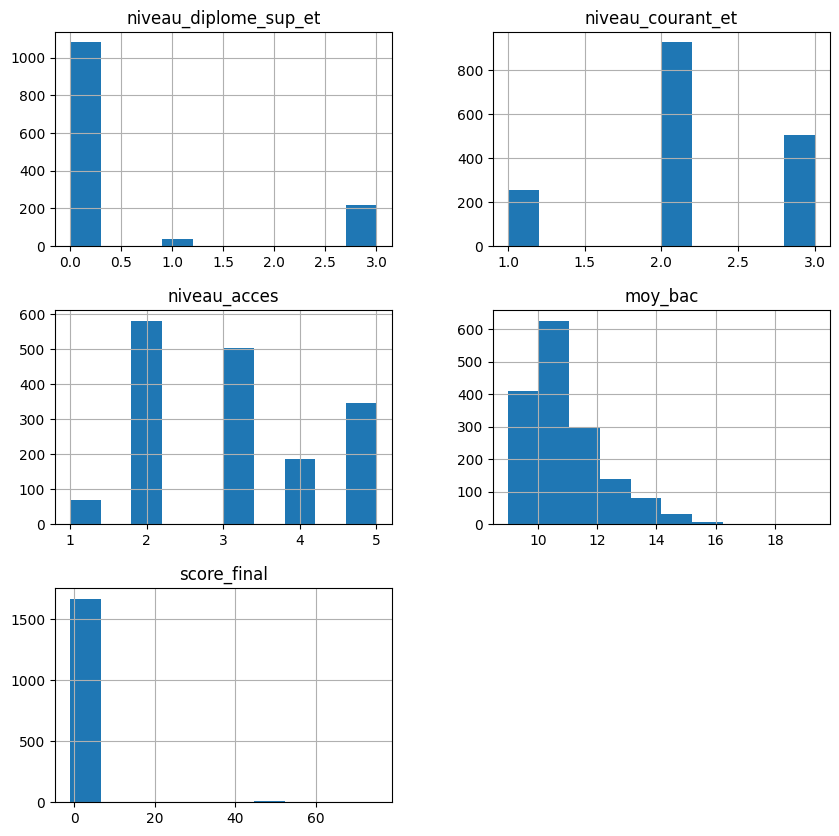

In [ ]:
#to understand how to fill the missing values using the mean or the median or the mode , reprsent the distribution of the data
df_copy.hist(figsize=(10,10))

In [ ]:
# fill nan values in 'niveau_diplome_sup_et' if 'lib_specialite_esp_et' starts with Master res=3 else fill with most frequent value(mode)
df_copy['niveau_diplome_sup_et'].fillna(df_copy['lib_specialite_esp_et'].apply(lambda x:x.startswith('Master')).map({True:3,False:df_copy['niveau_diplome_sup_et'].mode()[0]}),inplace=True)

<ipython-input-94-be3670f61bc0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['niveau_diplome_sup_et'].fillna(df_copy['lib_specialite_esp_et'].apply(lambda x:x.startswith('Master')).map({True:3,False:df_copy['niveau_diplome_sup_et'].mode()[0]}),inplace=True)


In [ ]:
df_copy[['niveau_diplome_sup_et','classe_courante_et']].loc[df_copy['niveau_diplome_sup_et']==0]

,niveau_diplome_sup_et,classe_courante_et
4,0.0,2-LSG-3
7,0.0,3LBC-BIS-1
8,0.0,3LBC-BIS-5
12,0.0,2-LBC-9
13,0.0,2-LBC-8
...,...,...
2616,0.0,3LBC-BIS-5
2617,0.0,2-LBC-6
2618,0.0,2-LSG-3
2619,0.0,3-LSC-2


In [ ]:
df_copy[['niveau_diplome_sup_et','classe_courante_et']].loc[df_copy['niveau_diplome_sup_et']==1]

,niveau_diplome_sup_et,classe_courante_et
19,1.0,2-LSG-5
21,1.0,3-LSG-1
48,1.0,2-LSG-5
57,1.0,3-LSC-2
277,1.0,2-LSG-4
478,1.0,3-LSG-1
691,1.0,3LBC-BIS-4
840,1.0,2-LBC-11
913,1.0,3-LBC-BI-1
991,1.0,2-LBC-5


In [ ]:
# Fill missing values with the mean of each column
df_copy[['moy_bac']] = df_copy[[ 'moy_bac']].fillna(df_copy[['moy_bac']].mean())

In [ ]:
#find the frequent gap between column date_bac and date_nais_et
from datetime import datetime

# Convert the date columns to datetime objects
df['date_bac'] = pd.to_datetime(df['date_bac'], format='%d/%m/%Y %H:%M', errors='coerce')
df['date_nais_et'] = pd.to_datetime(df['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate the gap and find the most frequent gap
frequent_gap = (df['date_bac'] - df['date_nais_et']).mean()
frequent_gap
#conert frequent_gap to years
frequent_gap = int(frequent_gap.days / 365)
frequent_gap

19

In [ ]:
from datetime import datetime

def convert_date(date_naiss):
    # Convert Timestamp to string if needed
    if isinstance(date_naiss, pd.Timestamp):
        date_naiss = date_naiss.strftime('%d/%m/%Y %H:%M')

    date_obj = datetime.strptime(date_naiss, '%d/%m/%Y %H:%M')
    us_format = date_obj.strftime('%d/%m/%Y %H:%M')
    year = int(us_format[6:10]) + 19
    return '01/06/' + str(year) + ' 00:00'

In [ ]:
print(convert_date(df['date_nais_et'].loc[df['id_et']=='ID619'].iloc[0]))

01/06/2024 00:00


In [ ]:
#fill missing value of df_copy['date_bac'] with the result of the function convert_date
df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)
print(df_copy['date_bac'].iloc[0])

01/06/2015 00:00


<ipython-input-101-2be329935977>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)


In [ ]:
# Convert missing values in date_entree_esp_et based on the value in lib_nature_bac
def convert_date_entree_esp_et(row):
    if row['lib_specialite_esp_et'].startswith('Licence'):
        start_date = row['date_bac']
    else:
        start_date = str("16/09/") + str(int(row['date_bac'][6:10]) + 3) + row['date_bac'][10:]
    return start_date



In [ ]:
# Fill missing values in date_entree_esp_et
df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)

<ipython-input-103-cc4052931db5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)


In [ ]:
print(df_copy['date_entree_esp_et'].iloc[3])
print(df_copy['date_bac'].loc[df['id_et']=='ID445'])
print(df_copy['date_entree_esp_et'].loc[df['id_et']=='ID445'])

01/06/2022 00:00
444    01/06/2020 00:00
Name: date_bac, dtype: object
444    16/09/2023 00:00
Name: date_entree_esp_et, dtype: object


In [ ]:
df_copy.isnull().sum()

,0
id_et,0
date_nais_et,0
lieu_nais_et,1
date_bac,0
etab_bac,150
niveau_diplome_sup_et,0
lib_specialite_esp_et,0
date_entree_esp_et,0
lib_nature_bac,43
classe_courante_et,0


In [ ]:
#fillissing values in nationalite by the most frequent value
df_copy['nationalite'].fillna(df_copy['nationalite'].mode()[0],inplace=True)

<ipython-input-106-e5e1b9f645de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['nationalite'].fillna(df_copy['nationalite'].mode()[0],inplace=True)


In [ ]:
#fill missing values in classe_prec_et
#count df_copy['date_bac'].year()==2024
df_copy['date_bac'].apply(lambda x: x[6:10]=='2024').value_counts()

,count
date_bac,
False,1685


In [ ]:
#remove students enrolled in 2024
# Create a boolean mask where the year in 'date_bac' is 2024
mask = df_copy['date_bac'].apply(lambda x: x[6:10] == '2024')

# Use the mask to drop the rows where the year is 2024, inplace
df_copy.drop(df_copy[mask].index, inplace=True)

In [ ]:
df_copy.isnull().sum()

,0
id_et,0
date_nais_et,0
lieu_nais_et,1
date_bac,0
etab_bac,150
niveau_diplome_sup_et,0
lib_specialite_esp_et,0
date_entree_esp_et,0
lib_nature_bac,43
classe_courante_et,0


In [ ]:
print(df_copy['id_et'].loc[pd.isna(df['classe_prec_et'])].count())

0


In [ ]:
df_copy.isnull().sum()

,0
id_et,0
date_nais_et,0
lieu_nais_et,1
date_bac,0
etab_bac,150
niveau_diplome_sup_et,0
lib_specialite_esp_et,0
date_entree_esp_et,0
lib_nature_bac,43
classe_courante_et,0


In [ ]:
df_copy_backup = df_copy.copy()

In [ ]:
# Create a boolean mask for the condition to drop rows for students starting this year : 2024
mask = df_copy['date_entree_esp_et'].apply(lambda x: x[6:10] == '2024' if pd.notnull(x) else False) | \
       df_copy['date_bac'].apply(lambda x: x[6:10] == '2024' if pd.notnull(x) else False)

# Use the mask to drop the rows where the condition is True, inplace
df_copy.drop(df_copy[mask].index, inplace=True)


In [ ]:
df_copy.isnull().sum()

,0
id_et,0
date_nais_et,0
lieu_nais_et,1
date_bac,0
etab_bac,129
niveau_diplome_sup_et,0
lib_specialite_esp_et,0
date_entree_esp_et,0
lib_nature_bac,42
classe_courante_et,0


In [ ]:
df_copy['lib_nature_bac'].unique()

array([nan, 'Bac Economie-gestion', 'Bac Economie',
       'Bac Sciences expérimentales', 'Bac Math', 'Bac téchnique',
       'Bac Technique', 'Scientifique', 'Bac Math ', 'Autre bac',
       'Bac Informatique', 'Bac Français', 'MATH GENIE CEVIL',
       'Bac Général', 'Economique et social'], dtype=object)

In [ ]:
#clean the column 'lib_nature_bac' by replacing 'Bac Economie-gestion' with 'Bac Economie'
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.lower().str.strip()
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac economie-gestion\b|\beconomique et social\b', 'bac economie', regex=True)
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac téchnique', 'bac technique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac sciences expérimentales','scientifique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac français\b|\bbac général\b', 'autre bac', regex=True)

# Fill missing values in 'lib_nature_bac' with the mode
mode_value = df_copy['lib_nature_bac'].mode()[0]
df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)

<ipython-input-116-1e2d29e5fd6c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)


In [ ]:
#remove the last 2 caracters in the column 'classe_prec_et' and 'classe_courante_et'
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[:-2])
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[:-2])

In [ ]:
#Categorical Values
df_categorical = df_copy.select_dtypes(include = 'object').copy()
df_categorical

,id_et,date_nais_et,lieu_nais_et,date_bac,etab_bac,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,classe_sem1,sexe,nationalite,classe_prec_et,resultat_annee_prec,gouvernorat
0,ID1,10/07/1996 00:00,Tunis,01/06/2015 00:00,NaN,Master Professionnel en Business Analytics,16/09/2018 00:00,bac economie,2-BA,2-BA-2,M,TUNISIENNE,1-BA,Admis,NaN
3,ID4,15/09/1999 00:00,TUNIS,01/06/2018 00:00,Lycée les pères blancs,Master Professionnel en Management Digital et ...,16/09/2021 00:00,bac economie,1-MDSI,1-MDSI-1,F,TUNISIENNE,3-LSG,ADMISE Mention Assez Bien,NaN
4,ID5,17/10/1999 00:00,Bizerte,01/06/2020 00:00,Lycée Bhira Bizerte,Licence en Sciences de Gestion,18/09/2023 00:00,bac economie,2-LSG,2-LSG-3,M,TUNISIENNE,1-LSG,ADMIS Mention Passable,Bizerte
7,ID8,09/09/2002 00:00,Gafsa,01/06/2022 00:00,Nabeul,Licence Business Computing- Parcours Business...,01/06/2022 00:00,bac economie,3LBC-BIS,3LBC-BIS-1,M,TUNISIENNE,2-LBC-BI,ADMIS Mention Assez Bien,Nabeul
8,ID9,12/06/2003 00:00,Benguerden,01/06/2022 00:00,bengarden,Licence Business Computing- Parcours Business...,01/06/2022 00:00,bac economie,3LBC-BIS,3LBC-BIS-5,F,TUNISIENNE,2-LBC-BI,ADMISE Mention Passable,Ariana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,ID2617,12/12/2000 00:00,Tunis,01/06/2022 00:00,Tunis 2,Licence Business Computing- Parcours Business...,01/06/2022 00:00,bac economie,3LBC-BIS,3LBC-BIS-5,M,TUNISIENNE,2-LBC-BI,ADMIS Mention Passable,Ariana
2617,ID2618,08/01/2005 00:00,Le kef,01/06/2023 00:00,Kef,Licence Business Computing,01/06/2023 00:00,scientifique,2-LBC,2-LBC-6,M,TUNISIENNE,1-LBC,ADMIS Mention Bien,Le Kef
2618,ID2619,20/06/2004 00:00,La marsa,01/06/2023 00:00,Lycee l'Aouina,Licence en Sciences de Gestion,28/08/2023 00:00,bac economie,2-LSG,2-LSG-3,M,TUNISIENNE,1-LSG,ADMIS Avec 10 ECTS non acquis,Tunis
2619,ID2620,21/01/2004 00:00,Tunis,01/06/2022 00:00,La marsa,Licence en Sciences de Gestion -Parcours Compt...,01/06/2022 00:00,scientifique,3-LSC,3-LSC-2,F,TUNISIENNE,2-LSC,ADMISE Mention Assez Bien,Tunis


In [ ]:
df_copy.isnull().sum()

,0
id_et,0
date_nais_et,0
lieu_nais_et,1
date_bac,0
etab_bac,129
niveau_diplome_sup_et,0
lib_specialite_esp_et,0
date_entree_esp_et,0
lib_nature_bac,0
classe_courante_et,0


In [ ]:
#give this student the most frequent value of lieu_nais_et
df_copy['lieu_nais_et'].fillna(df_copy['lieu_nais_et'].mode()[0],inplace=True)

<ipython-input-120-f7311f0a654e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['lieu_nais_et'].fillna(df_copy['lieu_nais_et'].mode()[0],inplace=True)


#### Frequency Encoding

In [ ]:
#Use Frequency encoding for nationalite
# Calculate the frequency of each category in 'nationalite'
nationalite_freq = df_copy['nationalite'].value_counts(normalize=True)
# Map the frequency values back to the 'nationalite' column
df_copy['nationalite_encoded'] = df_copy['nationalite'].map(nationalite_freq)

In [ ]:
# Convert column date_nais_et into an Age column and take the current year as 2024
now = pd.Timestamp('now').year
df_copy['date_nais_et'] = pd.to_datetime(df_copy['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')
# Create a new column 'age' and drop the column 'date_nais_et'
df_copy['age'] = now - df_copy['date_nais_et'].dt.year
df_copy.drop(['date_nais_et'], axis=1, inplace=True)


In [ ]:
#convert resultat_annee_prec into lowercase and remove extra spaces and leading spaces and for startwith(Admise) turn it into admis
for i in range(2):
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis' if x.startswith('admise') else x)
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'exclu' if x.startswith('exclue') else x)
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: ' '.join(x.lower().strip().split()))

In [ ]:
df_copy['resultat_annee_prec'].unique()

array(['admis', 'admis mention passable', 'admis mention assez bien',
       'admis avec 10 ects non acquis', 'exclu', 'redouble',
       'admis avec 14 ects non acquis', 'admis avec 6 ects non acquis',
       'admis avec 15 ects non acquis', 'admis avec 8 ects non acquis',
       'admis avec 12 ects non acquis', 'admis avec 5 ects non acquis',
       'admis mention bien', 'admis avec 4 ects non acquis',
       'admis mention très bien', 'admis avec 13 ects non acquis'],
      dtype=object)

In [ ]:
df_copy['resultat_annee_prec'].isna()

,resultat_annee_prec
0,False
3,False
4,False
7,False
8,False
...,...
2616,False
2617,False
2618,False
2619,False


#### Label Encoding of Categorical Feature

In [ ]:
#use Label encoding for the column 'lib_nature_bac'
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df_copy['lib_nature_bac_encoded'] = (labelencoder_y.fit_transform(df_copy['lib_nature_bac'])).astype('int64')
df_copy['sexe'] = (labelencoder_y.fit_transform(df_copy['sexe'])).astype('int64')
df_copy['gouvernorat'] = (labelencoder_y.fit_transform(df_copy['sexe'])).astype('int64')
df_copy['etab_bac'] = (labelencoder_y.fit_transform(df_copy['etab_bac'])).astype('int64')
df_copy['lieu_nais_et'] = (labelencoder_y.fit_transform(df_copy['lieu_nais_et'])).astype('int64')


In [ ]:
def custom_grade_encoder(grade):
    # Dictionary mapping grades to numerical values
    grade_mapping = {
        'exclu': 0,                           # Excluded - lowest
        'redouble': 1,                        # Repeat year
        'admis avec 15 ects non acquis': 2,   # Most ECTS credits missing
        'admis avec 14 ects non acquis': 3,
        'admis avec 13 ects non acquis': 4,
        'admis avec 12 ects non acquis': 5,
        'admis avec 10 ects non acquis': 6,
        'admis avec 8 ects non acquis': 7,
        'admis avec 6 ects non acquis': 8,
        'admis avec 5 ects non acquis': 9,
        'admis avec 4 ects non acquis': 10,   # Least ECTS credits missing
        'admis': 11,                          # Basic pass
        'admis mention passable': 12,         # Pass with fair mention
        'admis mention assez bien': 13,       # Pass with fairly good mention
        'admis mention bien': 14,             # Pass with good mention
        'admis mention très bien': 15         # Pass with very good mention - highest
    }
    return grade_mapping.get(grade, -1)  # Returns -1 for any unknown grade

# Apply the encoding to your dataframe
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(custom_grade_encoder)

In [ ]:
df_copy['resultat_annee_prec'].unique()

array([11, 12, 13,  6,  0,  1,  3,  8,  2,  7,  5,  9, 14, 10, 15,  4])

In [ ]:
#we start for variable lib_nature_bac
df_categorical['lib_nature_bac'].unique()

array(['bac economie', 'scientifique', 'bac math', 'bac technique',
       'autre bac', 'bac informatique', 'math genie cevil'], dtype=object)

In [ ]:
#clean the column=[classe_courante_et,classe_courante_et,classe_prec_et] by removing the first character or 2 first characters if 2nd character is a '-'
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])



### Target Encoding of Categorical Features

In [ ]:
'''# Calculate the mean of the target for each category in 'lib_nature_bac'
target_mean = df_copy.groupby('lib_nature_bac')['resultat_annee_prec'].mean()
# Map the calculated means back to the 'lib_nature_bac' column
df_copy['lib_nature_bac_encoded'] = df_copy['lib_nature_bac'].map(target_mean)'''


"# Calculate the mean of the target for each category in 'lib_nature_bac'\ntarget_mean = df_copy.groupby('lib_nature_bac')['resultat_annee_prec'].mean()\n# Map the calculated means back to the 'lib_nature_bac' column\ndf_copy['lib_nature_bac_encoded'] = df_copy['lib_nature_bac'].map(target_mean)"

In [ ]:
# Calculate the mean of the target for 'lib_specialite_esp_et'
specialite_mean = df_copy.groupby('lib_specialite_esp_et')['resultat_annee_prec'].mean()

# Map the calculated means back
df_copy['lib_specialite_esp_et_encoded'] = df_copy['lib_specialite_esp_et'].map(specialite_mean)

In [ ]:
# Calculate the mean of the target for 'classe_courante_et'
courante_mean = df_copy.groupby('classe_courante_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_courante_et_encoded'] = df_copy['classe_courante_et'].map(courante_mean)

In [ ]:
# Calculate the mean of the target for 'classe_prec_et'
prec_mean = df_copy.groupby('classe_prec_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_prec_et_encoded'] = df_copy['classe_prec_et'].map(prec_mean)

In [ ]:
df_copy['resultat_annee_prec'] = pd.to_numeric(df_copy['resultat_annee_prec'], errors='coerce')

In [ ]:
df_copy['age'] = pd.to_numeric(df_copy['age'], errors='coerce').astype('int64')

In [ ]:
print(type(df_copy['age'].iloc[0]))

<class 'numpy.int64'>


In [ ]:
# transform features dates into year format
import datetime
columns_to_transform = ['date_bac','date_entree_esp_et']
for col in columns_to_transform:
    df_copy[col] = df_copy[col].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').year)


### Data scaling

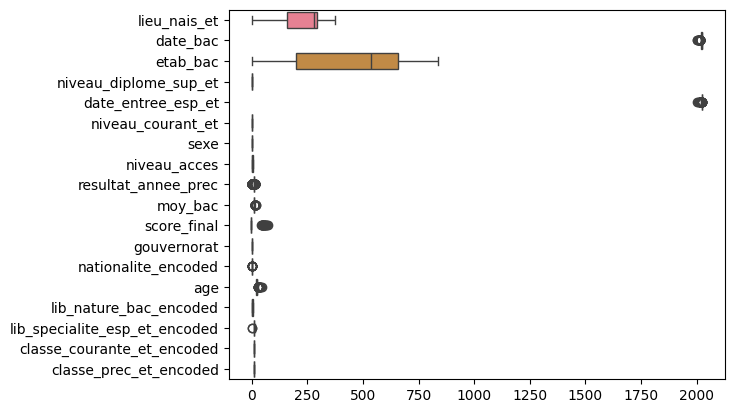

In [ ]:
ax = sns.boxplot(data=df_copy, orient='h')

###### It is recommended to use a MinMax scaler because Scaling techniques aim to normalize the range, distribution, and magnitude of features, reducing potential biases and inconsistencies that may arise from variations in their values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_copy.select_dtypes(include=['int64', 'float64']))
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.select_dtypes(include=['int64', 'float64']).columns)

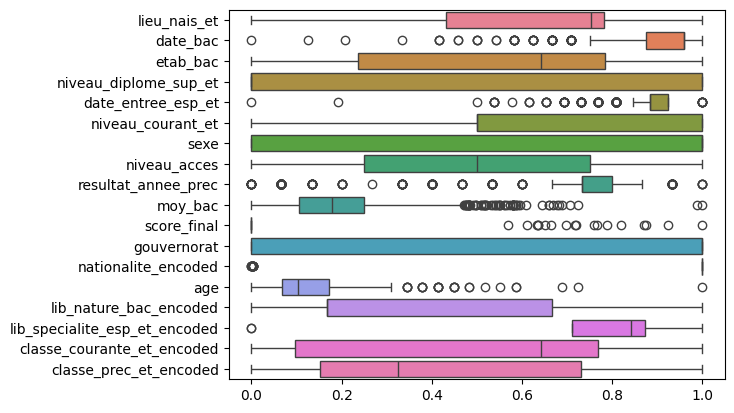

In [ ]:
ax = sns.boxplot(data=df_scaled, orient='h')

### Perform Chi2 Test Categ vs Categ

In [ ]:
from scipy.stats import chi2_contingency

# Liste des colonnes à vérifier
cols_to_check = ['etab_bac', 'gouvernorat', 'sexe','lieu_nais_et','nationalite']

# Parcourir chaque colonne
for col in cols_to_check:
    print(f"Analyse for column : {col}")

    # Contingence entre la colonne et la cible
    contingency_table = pd.crosstab(df[col], df['resultat_annee_prec'])

    # Test du Chi-2
    try:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        # Display the results
        print(f"p-value from the Chi-Square test: {p:.5f}")
        if p < 0.05:
            print("=> The column significantly influences the target.\n")
        else:
            print("=> No significant impact on the target.\n")
    except Exception as e:
        print(f"Error while analyzing the column {col}: {e}\n")

Analyse for column : etab_bac
p-value from the Chi-Square test: 0.99994
=> No significant impact on the target.

Analyse for column : gouvernorat
p-value from the Chi-Square test: 0.00000
=> The column significantly influences the target.

Analyse for column : sexe
p-value from the Chi-Square test: 0.00000
=> The column significantly influences the target.

Analyse for column : lieu_nais_et
p-value from the Chi-Square test: 0.00003
=> The column significantly influences the target.

Analyse for column : nationalite
p-value from the Chi-Square test: 1.00000
=> No significant impact on the target.



In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer  # Import KBinsDiscretizer

X = df_scaled[['etab_bac', 'gouvernorat', 'sexe','lieu_nais_et','nationalite_encoded','lib_nature_bac_encoded']]
y = df_scaled['resultat_annee_prec']

# Discretize the target variable into bins
n_bins = 3  # Choose the desired number of bins
kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape and ravel

# Now calculate chi-squared stats with the binned target
chi_scores = chi2(X, y_binned)
chi_scores

(array([4.52259242e-01, 5.19741057e+02, 5.19741057e+02, 2.98028026e-01,
        1.09185919e-02, 6.75054665e+00]),
 array([7.97614707e-001, 1.37931504e-113, 1.37931504e-113, 8.61557042e-001,
        9.94555579e-001, 3.42087669e-002]))

<Axes: >

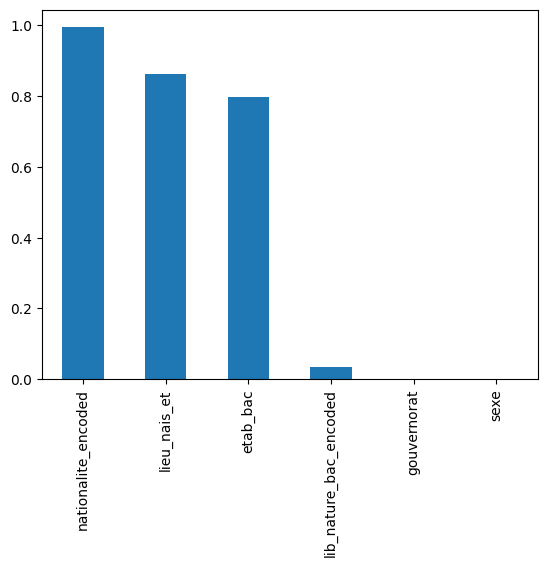

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Interpretations : </br>
Here we have 4 category predictors and one category response.
Since nationalite_encoded has higher the p-value, it says that this variables is independent of the response and can not be considered for model training

### Perform Multi-factor Anova (Analysis of Variance)


#####1. Main Effects
##### Define Hypothesis
* For Factor A:
*   Null Hypothesis (H₀): The means of the dependent variable are the same across all levels of Factor A.
*   Alternative Hypothesis (H₁): At least one mean of the dependent variable differs across the levels of Factor A.

In [ ]:
#the predictors have independent effects on the outcome
import statsmodels.formula.api as sm
from IPython.display import HTML
model = sm.ols('resultat_annee_prec ~ moy_bac + score_final', data=df_scaled).fit()
display(HTML(model.summary().as_html()))


#####2. Interaction Effects

Summary 1



Summary 2


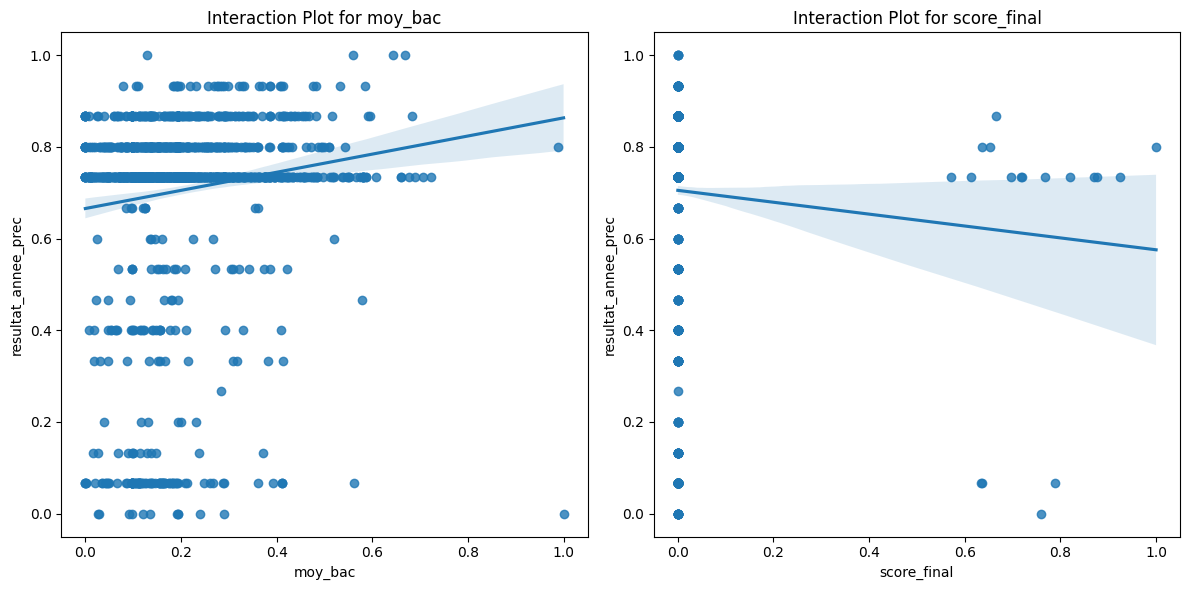

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models with interaction terms
model_interaction_1 = sm.ols('resultat_annee_prec ~ moy_bac * score_final', data=df_scaled).fit()
model_interaction_2 = sm.ols('resultat_annee_prec ~ score_final', data=df_scaled).fit()

# Print the ANOVA table
print('Summary 1')
display(HTML(model_interaction_1.summary().as_html()))
print('\nSummary 2')
display(HTML(model_interaction_2.summary().as_html()))

# Create interaction plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Interaction plot for model_interaction_1
sns.regplot(x='moy_bac', y='resultat_annee_prec', data=df_scaled, ax=axes[0])
axes[0].set_title('Interaction Plot for moy_bac')

# Interaction plot for model_interaction_2
sns.regplot(x='score_final', y='resultat_annee_prec', data=df_scaled, ax=axes[1])
axes[1].set_title('Interaction Plot for score_final')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

moy_bac results : F-statistic: 5.6215, p-value: 0.0000
score_final results : F-statistic: 0.7659, p-value: 0.7169
age results : F-statistic: 3.1655, p-value: 0.0000
niveau_acces results : F-statistic: 20.5276, p-value: 0.0000
niveau_courant_et results : F-statistic: 23.4754, p-value: 0.0000


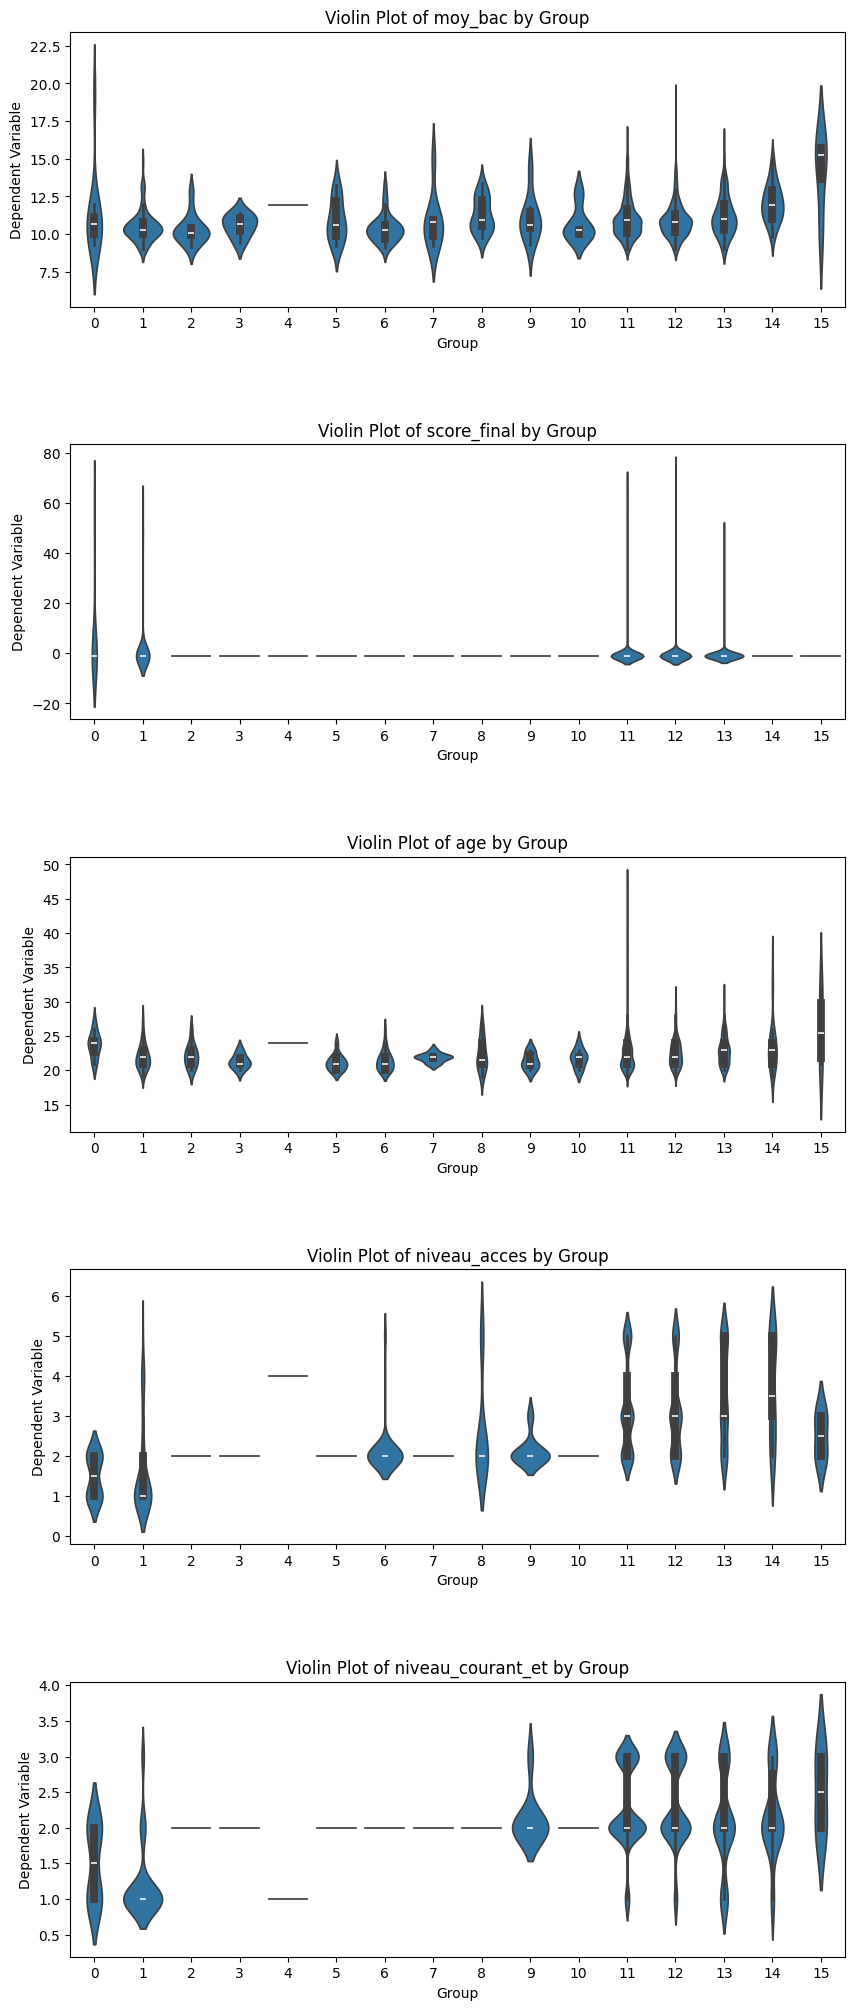

In [ ]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for ANOVA
def Anova_results(cols):
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, 5 * len(cols)))  # Create subplots
    fig.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

    for i, val in enumerate(cols):
        anova_data = []
        for group, values in df_copy.groupby('resultat_annee_prec')[val]:
            for value in values:
                anova_data.append([group, value])
        anova_df = pd.DataFrame(anova_data, columns=['Group', val])
        groups = [group_data[val].tolist() for group, group_data in anova_df.groupby('Group')]
        anova_result = f_oneway(*groups)
        print(val, f"results : F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

        # Plot on the corresponding subplot
        sns.violinplot(x='Group', y=val, data=anova_df, ax=axes[i])
        axes[i].set_title(f"Violin Plot of {val} by Group")
        axes[i].set_ylabel("Dependent Variable")
        axes[i].set_xlabel("Group")

    plt.show()  # Display the combined figure

cols_to_analyze = ['moy_bac', 'score_final', 'age', 'niveau_acces', 'niveau_courant_et']
Anova_results(cols_to_analyze)

In [ ]:
df_scaled.columns

Index(['lieu_nais_et', 'date_bac', 'etab_bac', 'niveau_diplome_sup_et',
       'date_entree_esp_et', 'niveau_courant_et', 'sexe', 'niveau_acces',
       'resultat_annee_prec', 'moy_bac', 'score_final', 'gouvernorat',
       'nationalite_encoded', 'age', 'lib_nature_bac_encoded',
       'lib_specialite_esp_et_encoded', 'classe_courante_et_encoded',
       'classe_prec_et_encoded'],
      dtype='object')

In [ ]:
df_scaled.drop(["etab_bac","gouvernorat","sexe",'nationalite_encoded','score_final', 'lieu_nais_et'],axis=1,inplace=True)


## Detect outliers

### Outliers on original data


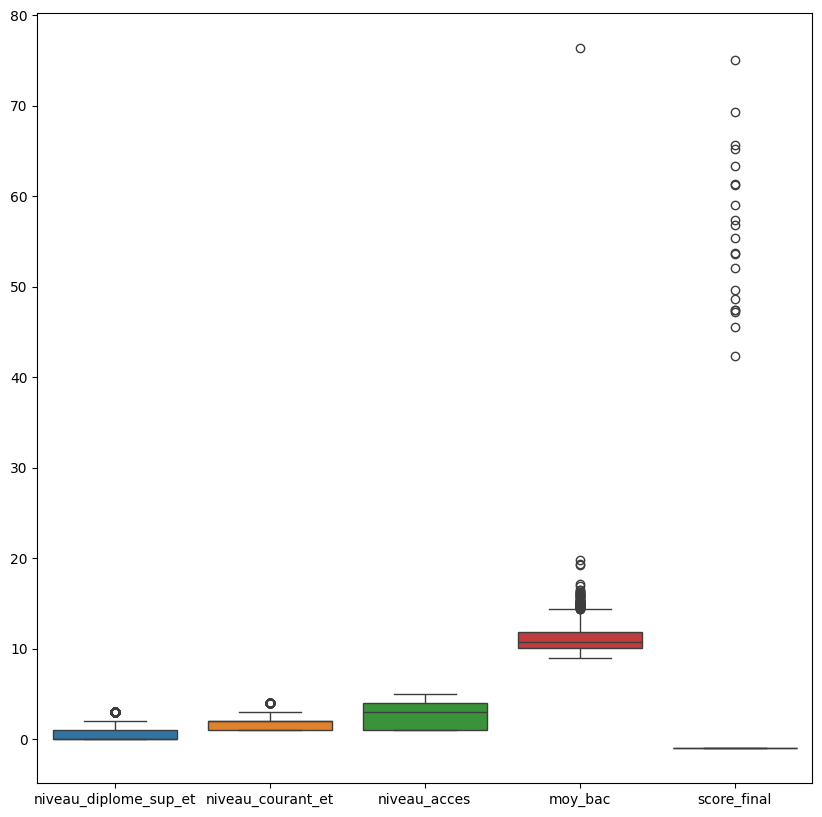

In [ ]:
# Create a boxplot to visualize the outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=0)
plt.show()

### Outliers on cleaned data

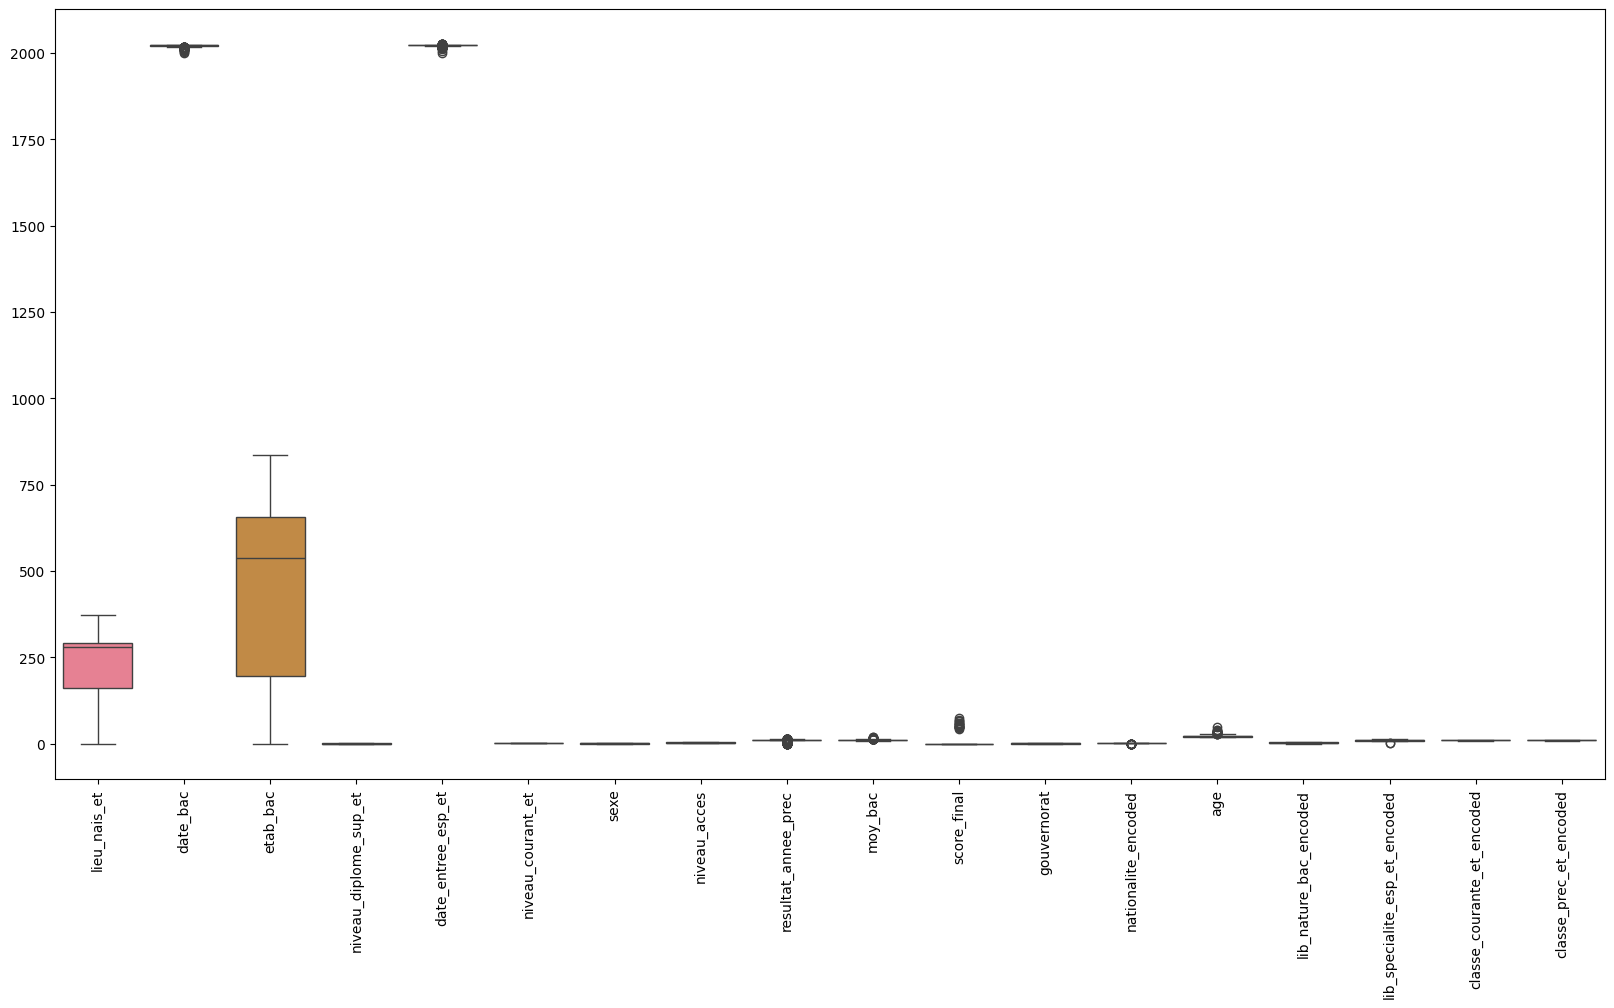

In [ ]:
# Create a boxplot to visualize the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df_copy)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Define the outliers function
def outliers(name_col):
	Q1 = df_copy[name_col].quantile(0.25)
	Q3 = df_copy[name_col].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	return df_copy[(df_copy[name_col] < lower_bound) | (df_copy[name_col] > upper_bound)]

# Call the outliers function
outliers('resultat_annee_prec')
outliers('moy_bac')

,id_et,lieu_nais_et,date_bac,etab_bac,niveau_diplome_sup_et,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,classe_sem1,...,resultat_annee_prec,moy_bac,score_final,gouvernorat,nationalite_encoded,age,lib_nature_bac_encoded,lib_specialite_esp_et_encoded,classe_courante_et_encoded,classe_prec_et_encoded
57,ID58,203,2022,546,1.0,Licence en Sciences de Gestion -Parcours Compt...,2022,bac economie,LSC,3-LSC-2,...,11,13.91,-1.0,0,0.990706,21,1,11.092784,11.065217,11.269231
66,ID67,13,2021,606,0.0,Licence en Sciences de Gestion,2021,bac economie,LSG,2-LSG-4,...,11,14.00,-1.0,0,0.990706,22,1,9.795031,9.768997,10.251163
85,ID86,23,2017,837,3.0,Master Professionnel Management Digital et Sys...,2020,scientifique,MDSI,NaN,...,11,15.00,-1.0,0,0.990706,26,6,11.622642,11.183824,11.303030
105,ID106,292,2021,17,0.0,Licence Business Computing,2023,scientifique,LBC-,2-LBC-11,...,11,15.83,-1.0,0,0.990706,22,6,9.526316,9.708661,9.444867
121,ID122,292,2020,371,3.0,"Master Professionnel en Comptabilité, Contrôle...",2023,bac economie,MCCA,2-MCCA-1,...,12,14.09,-1.0,2,0.990706,25,1,11.904762,11.904762,11.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,ID2453,39,2022,607,0.0,Licence en Sciences de Gestion,2022,bac economie,LSG,2-LSG-5,...,12,14.27,-1.0,2,0.990706,21,1,9.795031,9.768997,10.251163
2499,ID2500,292,2021,13,0.0,Licence Business Computing,2023,bac economie,LBC-,2-LBC-10,...,11,16.48,-1.0,0,0.990706,21,1,9.541916,9.708661,9.823171
2515,ID2516,292,2021,38,0.0,Licence en Sciences de Gestion -Parcours Compt...,2021,scientifique,LSC,3-LSC-1,...,12,14.15,-1.0,2,0.990706,22,6,11.092784,11.065217,11.269231
2610,ID2611,259,2018,441,3.0,Master Professionnel Management Digital et Sys...,2021,scientifique,MDSI,NaN,...,11,15.00,-1.0,0,0.990706,25,6,11.622642,11.183824,11.303030


In [ ]:
# Winsorize the target variable at the 5th and 95th percentiles
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].clip(
    lower=df_copy['resultat_annee_prec'].quantile(0.05),
    upper=df_copy['resultat_annee_prec'].quantile(0.95)
)

In [ ]:
# Remove outliers that are more than 3 standard deviations from the mean
threshold = 3 * df_copy['resultat_annee_prec'].std()
df_copy = df_copy[
    (df_copy['resultat_annee_prec'] > df_copy['resultat_annee_prec'].mean() - threshold) &
    (df_copy['resultat_annee_prec'] < df_copy['resultat_annee_prec'].mean() + threshold)
]

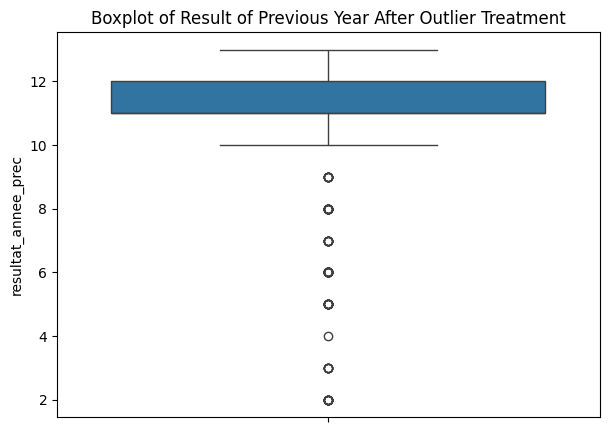

In [ ]:
# Visualize the result
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_copy, y='resultat_annee_prec')
plt.title('Boxplot of Result of Previous Year After Outlier Treatment')
plt.show()

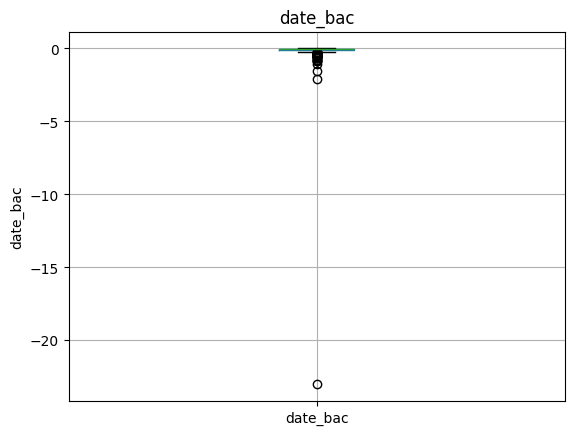

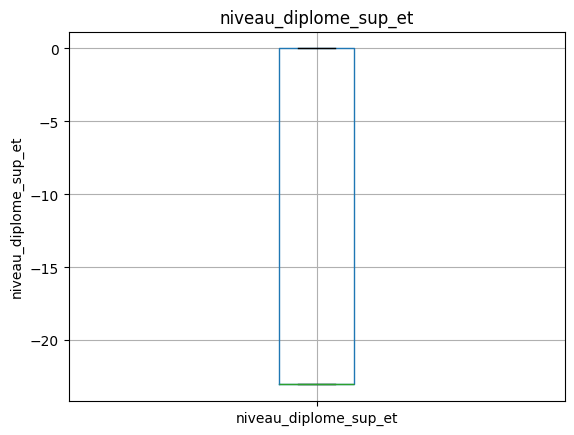

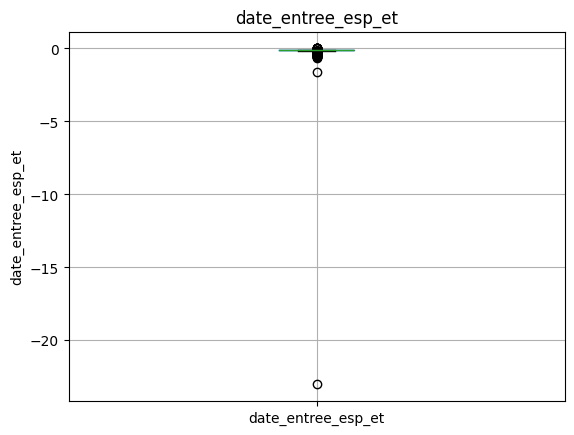

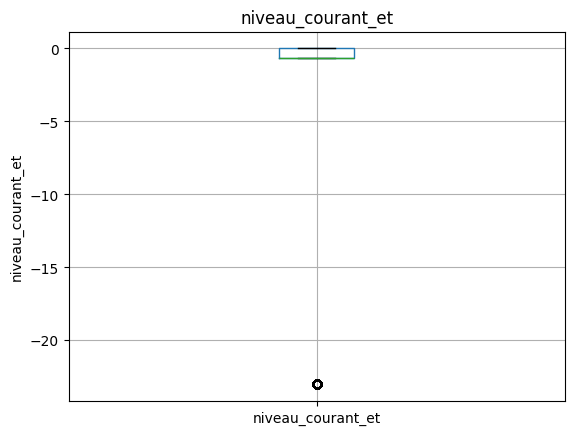

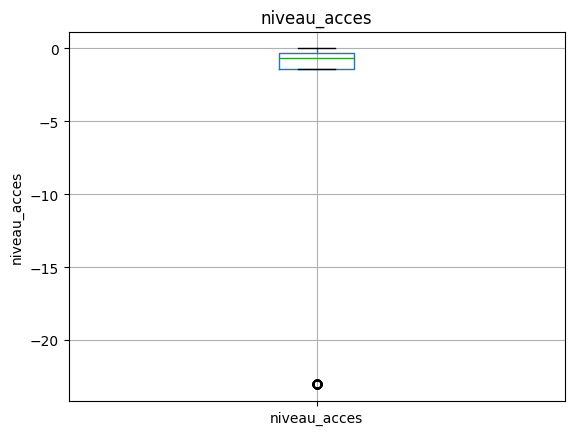

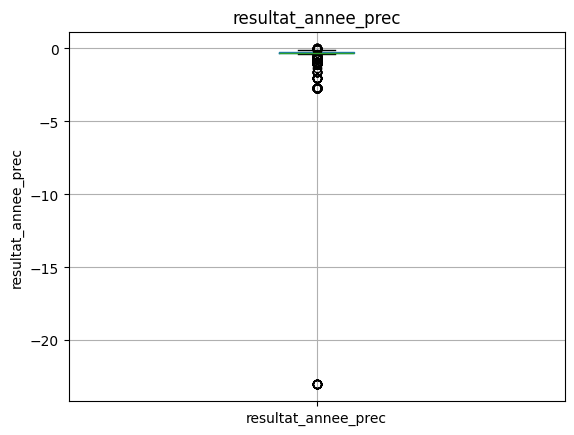

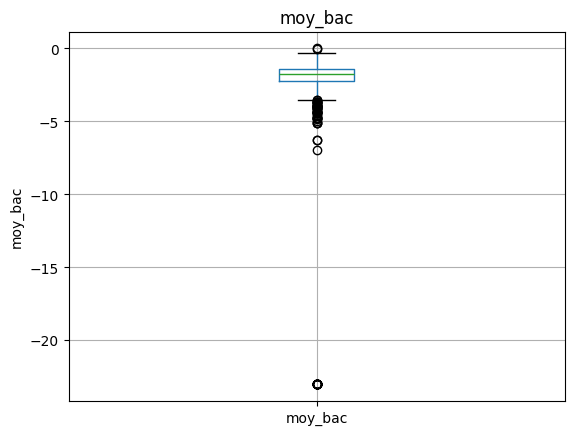

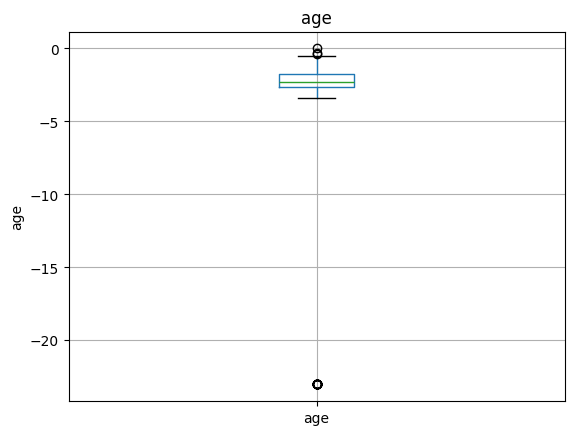

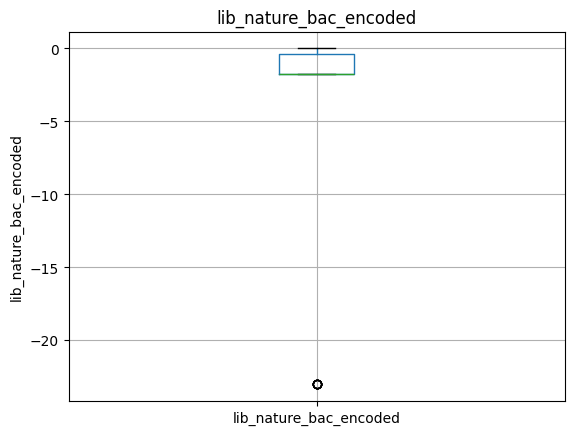

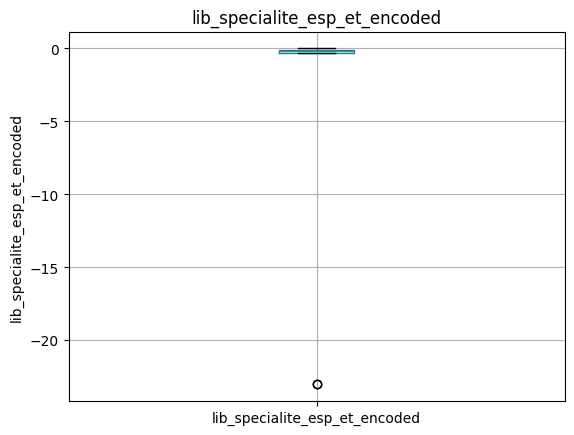

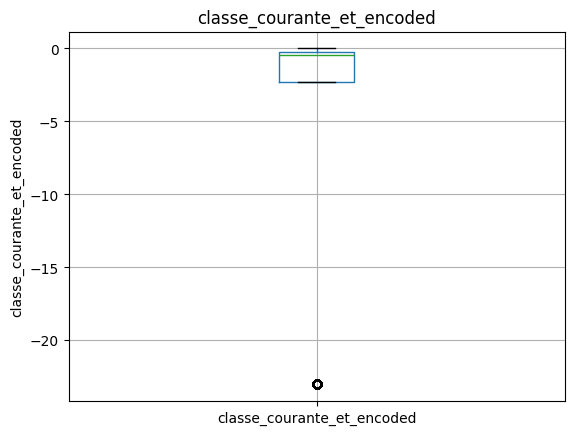

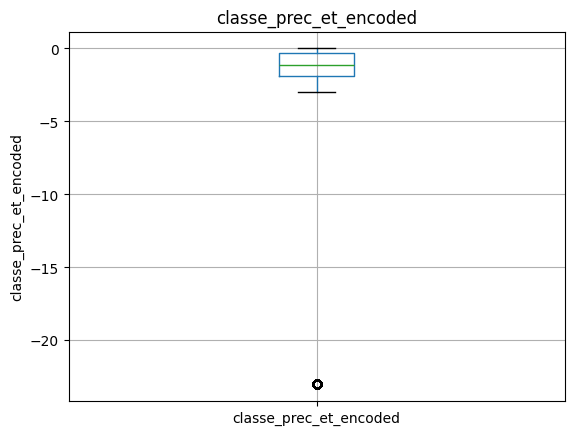

In [ ]:
for feature in df_scaled.select_dtypes(include=['int64', 'float64']).columns:
    data = df_scaled.select_dtypes(include=['int64', 'float64']).copy()
    try:
        data[feature] = np.where(data[feature] == 0, 1e-10, data[feature])
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()  # Ensure plot is displayed
    except Exception as e:
        print(f"Error with feature {feature}: {e}")

In [ ]:
# Create the boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='lib_nature_bac_encoded', y='resultat_annee_prec', data=df_scaled, palette="husl")

# Add title and labels
plt.title('Distribution of Result by Nature Bac', fontsize=16)
plt.xlabel('Nature Bac', fontsize=12)
plt.ylabel('Result', fontsize=12)

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=df_copy, x='resultat_annee_prec', y='moy_bac')

## Observations

#### Descriptive Analysis

In [ ]:
def descriptive_analysis(df):
    """
    Perform descriptive analysis on the dataset.
    """
    # Numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    print("Descriptive Statistics for Numerical Features:")
    print(df[numerical_cols].describe())

    # Calculate additional statistics
    for col in numerical_cols:
        print(f"\nStatistics for {col}:")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Variance: {df[col].var()}")
        print(f"Standard Deviation: {df[col].std()}")

    # Categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns

    print("\nDistribution of Categorical Features:")
    for col in categorical_cols:
        print(f"\nDistribution for {col}:")
        print(df[col].value_counts())

    # Visualizations
    for col in numerical_cols:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.savefig(f'{col}_distribution.png')
        plt.close()

    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Bar Chart of {col}")
        plt.tight_layout()
        plt.savefig(f'{col}_distribution.png')
        plt.close()

In [ ]:
!pip install nbformat


In [ ]:
#Visualize Admissions rate
import plotly.express as px
grade_mapping = {
        'exclu': 0,                           # Excluded - lowest
        'redouble': 1,                        # Repeat year
        'admis avec 15 ects non acquis': 2,   # Most ECTS credits missing
        'admis avec 14 ects non acquis': 3,
        'admis avec 13 ects non acquis': 4,
        'admis avec 12 ects non acquis': 5,
        'admis avec 10 ects non acquis': 6,
        'admis avec 8 ects non acquis': 7,
        'admis avec 6 ects non acquis': 8,
        'admis avec 5 ects non acquis': 9,
        'admis avec 4 ects non acquis': 10,   # Least ECTS credits missing
        'admis': 11,                          # Basic pass
        'admis mention passable': 12,         # Pass with fair mention
        'admis mention assez bien': 13,       # Pass with fairly good mention
        'admis mention bien': 14,             # Pass with good mention
        'admis mention très bien': 15         # Pass with very good mention - highest
    }
original_to_label = {v: k for k, v in grade_mapping.items()}
# Map grades to their descriptions
df_copy['Grade Description'] = df_copy['resultat_annee_prec'].map(original_to_label)

# Count occurrences of each grade description
grade_counts = df_copy['Grade Description'].value_counts().reset_index()
grade_counts.columns = ['Grade', 'Count']

# Calculate percentages
grade_counts['Percentage'] = (grade_counts['Count'] / grade_counts['Count'].sum()) * 100
print(df_copy['Grade Description'].value_counts())
# Create a pie chart
fig = px.pie(grade_counts, values='Percentage', names='Grade',
             title='Distribution of Grades Across Students',
             color='Grade',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the figure
fig.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_copy['resultat_annee_prec'], orient = 'v')

In [ ]:
#Heatmap
correlations = df_copy.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)
plt.show()

In [ ]:
def correlation_analysis(df):
    """
    Analyze correlations between variables in the dataset.
    """
    # Numerical features correlation
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Pearson correlation
    pearson_corr = df[numerical_cols].corr(method='pearson')
    print("Pearson Correlation Coefficients:")
    print(pearson_corr)

    # Spearman correlation
    spearman_corr = df[numerical_cols].corr(method='spearman')
    print("\nSpearman Correlation Coefficients:")
    print(spearman_corr)

    # Heatmap for Pearson correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Pearson Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('pearson_correlation_heatmap.png')
    plt.close()

    # Heatmap for Spearman correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Spearman Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('spearman_correlation_heatmap.png')
    plt.close()

    # Chi-square test for categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns

    print("\nChi-square Test Results:")
    for col in categorical_cols:
        for col2 in categorical_cols:
            if col != col2:
                contingency_table = pd.crosstab(df[col], df[col2])
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col} and {col2}: p-value = {p}")

    # Point-biserial correlation for binary vs numerical
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]

    print("\nPoint-biserial Correlation Results:")
    for bin_col in binary_cols:
        for num_col in numerical_cols:
            corr, p_value = pointbiserialr(df[bin_col], df[num_col])
            print(f"Point-biserial correlation between {bin_col} and {num_col}: correlation = {corr}, p-value = {p_value}")

#### Summary statistics

In [ ]:
#create with plotly histogram histfunc=sum  color=smoker
fig = px.histogram(df_copy, x='classe_courante_et', y='resultat_annee_prec', histfunc='sum', color='age')
fig.show()


In [ ]:
# 3. Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='classe_courante_et')
plt.title('Count of Students by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Bivariate distributions

In [ ]:
# scatter of  x=age y=lib_specialite_esp_et with animation over the time
fig = px.scatter(df_copy, x='age', y='classe_courante_et',size='age',size_max=13, animation_frame='date_entree_esp_et',color='age',hover_name='date_entree_esp_et',
                 title='Specialization vs Age Over Time')
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df_copy,  # Add the dataframe here
    x='moy_bac',
    y='resultat_annee_prec',
    color='moy_bac',
    trendline='ols',
    marginal_x='violin',  # Fixed typo in 'violin'
    marginal_y='box',
    title='Relationship between Bac Average and Previous Year Results',
    width=900,  # Increase width (in pixels)
    height=500,  # Increase height (in pixels)
    # Optional: Make points bigger
    size=[30] * len(df_copy),  # Fixed size for all points
    # Or use a variable for size:
    # size='moy_bac',  # Size based on bac average
    size_max=20  # Maximum size of the markers
)
fig.show()

In [ ]:
fig = px.scatter_matrix(
    df_copy,
    dimensions=['moy_bac','resultat_annee_prec','lib_nature_bac','classe_courante_et','score_final'],
    color='classe_courante_et',
    title='Scatter Matrix of Numerical Features',
    width=1200,
    height=1200
)


fig.show()

In [ ]:
def visualize_encoded_categories(df, category_col, encoded_col, target_col):
    # Define a color palette
    palette = sns.color_palette("hsv", len(df[category_col].unique()))

    # Create a mapping from category to color
    color_mapping = {category: palette[i] for i, category in enumerate(df[category_col].unique())}

    # Visualize
    plt.figure(figsize=(10, 6))
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        plt.scatter(subset[encoded_col], subset[target_col],
                    label=category, color=color_mapping[category], alpha=0.6)

    plt.title('Visualization with Target Encoding')
    plt.xlabel(encoded_col)
    plt.ylabel(target_col)
    plt.legend(title=category_col)
    plt.show()

In [ ]:
visualize_encoded_categories(df_copy, 'lib_nature_bac', 'lib_nature_bac_encoded', 'resultat_annee_prec')
visualize_encoded_categories(df_copy, 'classe_courante_et', 'classe_courante_et_encoded', 'resultat_annee_prec')


In [ ]:
# KDE Plot for 'lib_nature_bac_encoded'
plt.figure(figsize=(10, 6))
sns.kdeplot(df_scaled['lib_specialite_esp_et_encoded'], shade=True, color='b')
sns.kdeplot(df_scaled['classe_courante_et_encoded'], shade=True, color='r')
sns.kdeplot(df_scaled['resultat_annee_prec'], shade=True, color='g')
plt.title('KDE Plot encoded features')
plt.xlabel('lib_specialite_esp_et_encoded')
plt.ylabel('Density')
plt.show()

In [ ]:
# Horizontal Bar Chart
plt.figure(figsize=(12, 8))
sns.countplot(data=df_copy, x='nationalite', order=df_copy['nationalite'].value_counts().index)
plt.title('Count of Students by Nationality')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

In [ ]:
correlation_matrix = df_scaled.select_dtypes(include=['int64', 'float64']).corr()
correlation_matrix.columns

In [ ]:
# 5. Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_scaled.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 6. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='resultat_annee_prec', y='lib_specialite_esp_et_encoded')
plt.title('###')
plt.xlabel('resultat_annee_prec')
plt.ylabel('lib_specialite_esp_et')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.select_dtypes(include=['int32','int64', 'float64']).corr()
# Extract the correlation with the target variable 'resultat_annee_prec'
target_correlation = correlation_matrix['resultat_annee_prec'].sort_values(ascending=False)
print(target_correlation)

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='classe_courante_et_encoded', y='resultat_annee_prec')
plt.title('Scatter Plot of Result of Previous Year by Current Class')
plt.xlabel('Current Class (Encoded)')
plt.ylabel('Result of Previous Year')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_scaled, x='resultat_annee_prec', bins=20, kde=True)
plt.title('Distribution of Result of Previous Year')
plt.xlabel('Result of Previous Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 2. Boxplot
plt.figure(figsize=(15, 11))
sns.boxplot(data=df_copy, x='lib_nature_bac', y='resultat_annee_prec')
plt.title('Boxplot of Final Scores by Nature of Baccalaureate')
plt.xlabel('Nature of Baccalaureate')
plt.ylabel('Last year result')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Visualizations
sns.histplot(df_copy['age'], kde=True)
plt.show()

In [ ]:
df_copy['year_gap']=df_copy['date_bac']-df_copy['date_entree_esp_et']

In [ ]:
# Assuming 'resultat_annee_prec_map' contains the original values before labeling
plt.scatter(df_copy['date_entree_esp_et'], df_copy['resultat_annee_prec'])
plt.xlabel('date_entree_esp_et')
plt.ylabel('Previous Year Result')
plt.show()


In [ ]:
plt.scatter(df_copy['year_gap'],df_copy['resultat_annee_prec'])
plt.xlabel('year_gap')
plt.ylabel('Previous Year Result')
plt.show()


In [ ]:
plt.scatter(df_copy['date_bac'],df_copy['resultat_annee_prec'])
plt.xlabel('date_bac')
plt.ylabel('Previous Year Result')
plt.show()


In [ ]:
df_copy['date_bac'].loc[df_copy['date_bac']==1999]

In [ ]:
## Lets Find the realtionship between them and Sale PRice
for feature in df_scaled.select_dtypes(include=['int64', 'float64']).columns:
    data=df_scaled.copy()
    data.groupby(feature)['resultat_annee_prec'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


In [ ]:
#pair plot
plt.figure(figsize=(20, 15))
sns.pairplot(df_copy)
plt.show()


## Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create Copies of the DataFrame for Each Technique
df_scaled_var = df_scaled.copy()
df_scaled_kbest = df_scaled.copy()
df_scaled_rfe = df_scaled.copy()
df_scaled_tree = df_scaled.copy()

# Step 2: Apply Feature Selection Techniques

# Low Variance
selector = VarianceThreshold(threshold=0.1)
df_scaled_var = selector.fit_transform(df_scaled_var)
df_scaled_var = pd.DataFrame(df_scaled_var, columns=df_scaled.columns[selector.get_support()])

#Test Annova
#chi2 test
#f_classif test
#Rsquare test
# SelectKBest
X = df_scaled_kbest.drop(columns=['resultat_annee_prec'])
y = df_copy['resultat_annee_prec']
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_kbest = select_k_best.fit_transform(X, y)
selected_features_kbest = X.columns[select_k_best.get_support()]
df_scaled_kbest = pd.DataFrame(X_kbest, columns=selected_features_kbest)

# RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]
df_scaled_rfe = pd.DataFrame(fit.transform(X), columns=selected_features_rfe)

# Tree-based
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_tree = X.columns[indices[:10]]
df_scaled_tree = df_scaled_tree[selected_features_tree]

# Step 3: Visualize Selected Features

# Bar plot for feature importances (Tree-based)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Tree-based)')
plt.bar(range(len(selected_features_tree)), importances[indices[:10]], align='center')
plt.xticks(range(len(selected_features_tree)), selected_features_tree, rotation=90)
plt.show()

# Step 4: Evaluate Model Performance

# Function to evaluate model performance
def evaluate_model(X, y, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique
accuracy_var = evaluate_model(df_copy, y, df_scaled_var.columns)
accuracy_kbest = evaluate_model(df_copy, y, selected_features_kbest)
accuracy_rfe = evaluate_model(df_copy, y, selected_features_rfe)
accuracy_tree = evaluate_model(df_copy, y, selected_features_tree)

# Print the accuracies
print(f"Accuracy (Low Variance): {accuracy_var:.4f}")
print(f"Accuracy (SelectKBest): {accuracy_kbest:.4f}")
print(f"Accuracy (RFE): {accuracy_rfe:.4f}")
print(f"Accuracy (Tree-based): {accuracy_tree:.4f}")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df_scaled_pca=df_scaled.copy()
X = df_scaled_pca.drop(columns=['resultat_annee_prec'])
y = df_scaled_pca['resultat_annee_prec']
# Fit PCA to the data
pca = PCA().fit(X)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Identify the number of components that capture at least 95% of the variance
num_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components that capture at least 95% of the variance: {num_components_95}")

## Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Principal Component Analysis and visualize the variance explained by each component
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit(X)
# summarize components
print("Explained Variance: %s" % (X_pca.explained_variance_ratio_,))
print(X_pca.components_)
print(X_pca.explained_variance_)
print(X_pca.explained_variance_ratio_)

###### When performing PCA, each principal component explains a certain percentage of the total variance in the data. By examining the explained variance of the first few components, you can determine how many components are necessary to capture a sufficient amount of the total variance

In [ ]:
# Visualize results of X_pca with scatter plot
X_pca = pca.transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Annotate each point with its label
'''for label, x, y in zip(y, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=8, color='blue')
'''
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Visualization')
plt.grid()
plt.show()

In [ ]:
# Convert continuous target to discrete classes
from sklearn.preprocessing import KBinsDiscretizer
def prepare_target(y, n_bins=3):
    kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()
    return y_binned

In [ ]:
# Option 1: L1-regularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel # Import SelectFromModel
feature_sel_model_LG = SelectFromModel(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
)
y_binned = prepare_target(y_train,3)
feature_sel_model_LG.fit(X_train, y_binned)
selected_feat_LG = X_train.columns[(feature_sel_model_LG.get_support())]

print('\nStats for Logistic Regression:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat_LG)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model_LG.estimator_.coef_[0] == 0)))
print(selected_feat_LG)



In [ ]:
# Option 2: L1-regularized Linear SVC
from sklearn.svm import LinearSVC
feature_sel_model_SVM = SelectFromModel(
    LinearSVC(penalty='l1', dual=False, random_state=0)
)
feature_sel_model_SVM.fit(X_train,  y_binned)
selected_feat_SVM = X_train.columns[(feature_sel_model_SVM.get_support())]

print('\nStats for Linear SVC:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat_SVM)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model_SVM.estimator_.coef_[0] == 0)))
print(selected_feat_SVM)

#### Evaluate Model Performance with Regularization

In [ ]:
# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    # Convert continuous target to classes
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y_binned,
        test_size=0.2,
        random_state=42
    )
    model = LogisticRegression(max_iter=1000, penalty=penalty, C=C, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique with L2 regularization
accuracy_var_l2 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l2')
accuracy_kbest_l2 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l2')
accuracy_rfe_l2 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l2')
accuracy_tree_l2 = evaluate_model(df_copy, y, selected_features_tree, penalty='l2')

# Evaluate performance for each technique with L1 regularization
accuracy_var_l1 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l1')
accuracy_kbest_l1 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l1')
accuracy_rfe_l1 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l1')
accuracy_tree_l1 = evaluate_model(df_copy, y, selected_features_tree, penalty='l1')

In [ ]:
# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    # Convert continuous target to classes
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y_binned,
        test_size=0.2,
        random_state=42
    )

    # Train and evaluate
    model = LogisticRegression(
        max_iter=1000,
        penalty=penalty,
        C=C,
        solver='liblinear'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

# Evaluate with L2
results_l2 = {
    'Variance': evaluate_model(df_copy, y, df_scaled_var.columns, 'l2'),
    'KBest': evaluate_model(df_copy, y, selected_features_kbest, 'l2'),
    'RFE': evaluate_model(df_copy, y, selected_features_rfe, 'l2'),
    'Tree': evaluate_model(df_copy, y, selected_features_tree, 'l2')
}

# Evaluate with L1
results_l1 = {
    'Variance': evaluate_model(df_copy, y, df_scaled_var.columns, 'l1'),
    'KBest': evaluate_model(df_copy, y, selected_features_kbest, 'l1'),
    'RFE': evaluate_model(df_copy, y, selected_features_rfe, 'l1'),
    'Tree': evaluate_model(df_copy, y, selected_features_tree, 'l1')
}

In [ ]:
results_l2

In [ ]:
results_l1

### Key Findings : </br>
Variance-based Selection
*   Best performing method
*  L1 shows better performance (99.07%) than L2 (87.93%)</br>
Suggests high variance features are most predictive

Other Methods (KBest, RFE, Tree)
*   Similar performance (~56-57%)
*   Consistent across both L1 and L2</br>
Suggests possible underfitting

Regularization Impact
* L1 slightly improved Variance method
Minimal impact on other methods</br>
Indicates sparse feature importance

## Clustering

### K-Means

#### Clustering Analysis

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
#visualize the best number of clusters
wcss = []
silhouette_scores = []
max_clusters=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

    if i > 1:  # Silhouette score needs at least 2 clusters
        silhouette_scores.append(
            silhouette_score(X_train, kmeans.labels_)
        )

# Plot elbow curve
fig = go.Figure()

# WCSS plot
fig.add_trace(go.Scatter(
    x=list(range(1, max_clusters + 1)),
    y=wcss,
    mode='lines+markers',
    name='WCSS',
    line=dict(color='blue')
))

    # Silhouette scores
fig.add_trace(go.Scatter(
    x=list(range(2, max_clusters + 1)),
    y=silhouette_scores,
    mode='lines+markers',
    name='Silhouette Score',
    line=dict(color='red'),
    yaxis='y2'
    ))

fig.update_layout(
    title='Elbow Method & Silhouette Analysis',
    xaxis_title='Number of Clusters',
    yaxis_title='Within Cluster Sum of Squares',
    yaxis2=dict(
        title='Silhouette Score',
        overlaying='y',
        side='right'
        ),
    showlegend=True
    )

fig.show()

In [ ]:
def interpret_clustering_results(wcss, silhouette_scores):
    """Interpret clustering evaluation metrics"""

    # Calculate elbow point
    wcss_diff = np.diff(wcss)
    elbow_point = np.argmin(wcss_diff) + 1

    # Find best silhouette score
    best_k = np.argmax(silhouette_scores) + 2  # +2 because silhouette starts at k=2

    print("Clustering Analysis Results:")
    print(f"Suggested number of clusters (elbow method): {elbow_point}")
    print(f"Optimal clusters (silhouette score): {best_k}")
    print(f"Best silhouette score: {max(silhouette_scores):.3f}")

    # WCSS interpretation
    print("\nWCSS Interpretation:")
    print("- Lower WCSS indicates more compact clusters")
    print("- Elbow point shows diminishing returns for additional clusters")

    # Silhouette interpretation
    print("\nSilhouette Score Interpretation:")
    print("- Scores near 1 indicate well-defined clusters")
    print("- Scores near 0 indicate overlapping clusters")
    print("- Negative scores indicate potential misclassification")

In [ ]:
def perform_clustering(df_scaled, method='kmeans', n_clusters=3, eps=0.5, min_samples=5):
    """
    Perform clustering using the specified method and parameters.
    """
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        model = DBSCAN(eps=eps, min_samples=min_samples)
    elif method == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError("Unsupported clustering method.")

    labels = model.fit_predict(df_scaled)
    return labels

def evaluate_clustering(df_scaled, labels, method):
    """
    Evaluate clustering performance using silhouette score and Davies-Bouldin index.
    """
    if len(set(labels)) > 1:  # Check if more than one cluster is formed
        silhouette_avg = silhouette_score(df_scaled, labels)
        davies_bouldin = davies_bouldin_score(df_scaled, labels)
        print(f"{method} - Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}")
    else:
        print(f"{method} - Only one cluster formed.")

def visualize_clusters(df_scaled, labels_dict):
    """
    Visualize clusters using PCA for dimensionality reduction.
    """
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

    plt.figure(figsize=(12, 4))
    for i, (method, labels) in enumerate(labels_dict.items(), 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis')
        plt.title(f'{method} Clustering')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
    plt.tight_layout()
    plt.show()



In [ ]:
!pip install kneed # Install the 'kneed' library


In [ ]:
#Loacte the Knee point
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow

#### Train a K-Means Clustering Model

In [ ]:
! pip install optuna


In [ ]:
import optuna
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def optimize_clustering(df_scaled, method='kmeans', n_trials=100):
    def objective(trial):
        if method == 'kmeans':
            params = {
                'n_clusters': trial.suggest_int('n_clusters', 2, 10),
                'init': trial.suggest_categorical('init', ['k-means++', 'random']),
                'n_init': trial.suggest_int('n_init', 5, 15),
                'max_iter': trial.suggest_int('max_iter', 100, 500)
            }
            model = KMeans(**params)

        elif method == 'dbscan':
            params = {
                'eps': trial.suggest_float('eps', 0.1, 1.0),
                'min_samples': trial.suggest_int('min_samples', 2, 10),
                'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
            }
            model = DBSCAN(**params)

        elif method == 'hierarchical':
            # Suggest linkage first
            linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

            params = {
                'n_clusters': trial.suggest_int('n_clusters', 2, 10),
                'linkage': linkage
            }

            # Add metric (distance) based on linkage
            if linkage == 'ward':
                params['metric'] = 'euclidean'  # Ward only supports Euclidean
            else:
                params['metric'] = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])

            model = AgglomerativeClustering(**params)

        # Fit and evaluate
        labels = model.fit_predict(df_scaled)

        # Handle case where all points are noise (-1 label in DBSCAN)
        if len(set(labels)) < 2:
            return float('-inf')

        score = silhouette_score(df_scaled, labels)
        return score

    # Create study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_trial.params, study.best_value


# Usage
best_params_kmeans, best_score_kmeans = optimize_clustering(df_scaled, method='kmeans')
best_params_dbscan, best_score_dbscan = optimize_clustering(df_scaled, method='dbscan')
best_params_hierarchical, best_score_hierarchical = optimize_clustering(df_scaled, method='hierarchical')

print(f"Best KMeans params: {best_params_kmeans}, Score: {best_score_kmeans:.3f}")
print(f"Best DBSCAN params: {best_params_dbscan}, Score: {best_score_dbscan:.3f}")
print(f"Best Hierarchical params: {best_params_hierarchical}, Score: {best_score_hierarchical:.3f}")


In [ ]:
# Train Clustering Models
kmeans = perform_clustering(df_scaled, method='kmeans', n_clusters=3)
dbscan = perform_clustering(df_scaled, method='dbscan', eps=0.5, min_samples=5)
hierarchical = perform_clustering(df_scaled, method='hierarchical', n_clusters=3)

#### Evaluate Clustering

In [ ]:
# Evaluate Clustering
print("\nClustering Evaluation:")
evaluate_clustering(df_scaled, kmeans, 'K-Means')
evaluate_clustering(df_scaled, dbscan, 'DBSCAN')
evaluate_clustering(df_scaled, hierarchical, 'Hierarchical')

### Key points </br>
* The silhouette score : runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating a poor match between the data points and their corresponding cluster and commonly set at 0.5.
* Davies-Bouldin Index : similarity is defined as the ratio between inter-cluster and intra-cluster distances. As such, this index ranks well-separated clusters with less dispersion as having a better score.

#### Visualize Clusters

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
y_kmeans = kmeans.labels_

In [ ]:
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='green',label='Cluster 2')
plt.scatter(X_pca[y_kmeans==3,0],X_pca[y_kmeans==3,1],c='yellow',label='Cluster 3')
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

In [ ]:
# Visualize Clusters
labels_dict = {
        'K-Means': kmeans,
        'DBSCAN': dbscan,
        'Hierarchical': hierarchical
    }
visualize_clusters(df_scaled, labels_dict)

#### Profiling

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df_scaled.columns)
cluster_centers

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df_scaled.columns)
cluster_centers

#### Discover to which cluster each student belongs

In [ ]:
dataset_cluster = pd.concat([df, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
dataset_cluster.head()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cross_val_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#visualize the best number of neighbors
k_range = range(1, 11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#### Train a KNN Classifier

In [ ]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


#### KNN Model Evaluation

In [ ]:
# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

#### Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

#### Now how to predict to which cluster a new student belongs ?

### Random Forest Classifier

### XGBoost Classifier

#### Train Model

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def train_xgboost_model(X_train, y_train, params=None):
    """Train XGBoost model with given parameters."""
    if params is None:
        params = {
            'max_depth': 6, # Common range: 3-10
            'learning_rate': 0.1, # Smaller = more robust but slower
            'n_estimators': 100, # 100 trees is good starting point, Can increase if underfitting
            'objective': 'multi:softmax', # Multiclass classification
            'num_class': 3 # Matches our target variable
        }
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train,
        y_train,
        eval_metric=['merror', 'mlogloss'],
        eval_set=[(X_train, y_train)],
        verbose=True
    )

    return model
model = train_xgboost_model(X_train, y_train)
#used API provided by xgboost
eval_results = model.evals_result()

#### Evaluate Model

In [ ]:
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance."""
    predictions = model.predict(X_test)

    results = {
        'accuracy': accuracy_score(y_test, predictions),
        'classification_report': classification_report(y_test, predictions),
        'confusion_matrix': confusion_matrix(y_test, predictions),
        'cv_scores': cross_val_score(model, X_test, y_test, cv=5)
    }

    return results

# Evaluate
results = evaluate_model(model, X_test, y_test)
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"CV Mean: {results['cv_scores'].mean():.4f} (+/- {results['cv_scores'].std()*2:.4f})")
print("\nClassification Report:")
print(results['classification_report'])

#### Visualizations

In [ ]:
def plot_feature_importance(model, feature_names):
    """Plot feature importance."""
    importance = model.feature_importances_
    fig = px.bar(
        x=feature_names,
        y=importance,
        title='Feature Importance in Student Performance Prediction'
    )
    fig.show()

def plot_learning_curves(results):
    """Plot learning curves to interpret the performance of XGBoost model"""
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        y=results['validation_0']['merror'],
        name='Train Error'
    ))

    fig.add_trace(go.Scatter(
        y=results['validation_0']['mlogloss'],
        name='Train Log Loss'
    ))

    fig.update_layout(
        title='XGBoost Learning Curves',
        xaxis_title='Iterations',
        yaxis_title='Error'
    )
    fig.show()

# Visualize
plot_feature_importance(model, X_train.columns)
plot_learning_curves(model.evals_result())

#### Interpret Feature Importance

In [ ]:
def interpret_xgboost_results(model, evaluation_results):
    """Interpret XGBoost model results with insights and visualizations."""

    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Get learning curves
    learning_curves = model.evals_result()
    train_error = learning_curves['validation_0']['merror']
    val_loss = learning_curves['validation_0']['mlogloss']

    # Analyze convergence and overfitting
    convergence = 'Good' if train_error[-1] < 0.1 else 'Poor'
    overfitting_status = 'Potential overfitting' if results['cv_scores'].std() > 0.1 else 'No significant overfitting'

    # Create interpretations
    interpretations = {
        'feature_importance': {
            'most_important': feature_importance.head(3)['feature'].tolist(),
            'least_important': feature_importance.tail(3)['feature'].tolist(),
        },
        'performance_metrics': results,
        'learning_curves': {
            'convergence': convergence,
            'overfitting_status': overfitting_status
        }
    }

    # Print insights
    print("\n=== XGBoost Model Interpretation ===")
    print("\n1. Feature Importance:")
    print(f"   Top features: {', '.join(interpretations['feature_importance']['most_important'])}")
    print(f"   Least important features: {', '.join(interpretations['feature_importance']['least_important'])}")

    print("\n2. Model Performance:")
    print(f"   Accuracy: {results['accuracy']:.2f}")
    print(f"   Overfitting Status: {overfitting_status}")

    print("\n3. Recommendations:")
    if 'technical_skills' in interpretations['feature_importance']['most_important']:
        print("   - Strengthen technical skills curriculum.")
    if 'soft_skills' in interpretations['feature_importance']['most_important']:
        print("   - Enhance soft skills development.")

    return interpretations
